In [11]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve, validation_curve
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
# data = pd.read_csv("./feature/feautre.csv", index_col=None)
data = pd.read_csv("./feature/feautre_nomvc.csv", index_col=None)
data = np.array(data)
print(data.shape)
X = data[:, :-1]
Y = data[:, -1]
scaler=MinMaxScaler()
X = scaler.fit_transform(X) # 缩放到[0, 1]
# dump(scaler, 'scaler_force.joblib')#存储归一化模型
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=66)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
print(X_train)
accuracy=[]



(5267, 127)
[[8.09637099e-04 8.26780243e-04 4.11764177e-02 ... 7.09354483e-04
  2.52296204e-01 9.90024062e-01]
 [1.55692747e-03 1.55882671e-03 1.00000000e+00 ... 5.69481768e-04
  8.05021487e-01 6.18975450e-01]
 [7.78361658e-03 7.79992751e-03 2.73075087e-02 ... 2.25794526e-03
  3.02771496e-02 9.79848916e-01]
 ...
 [8.55469493e-04 9.08962931e-04 1.00000000e+00 ... 9.19163556e-04
  7.35510749e-01 9.59925831e-01]
 [1.53170135e-03 1.56802274e-03 2.15513914e-02 ... 4.89554502e-04
  6.21739314e-01 9.62512816e-01]
 [1.73876767e-03 1.74409941e-03 1.00000000e+00 ... 6.59399942e-04
  7.31778786e-01 9.09233823e-01]]


训练集准确率：99.89%
测试集准确率：91.46%


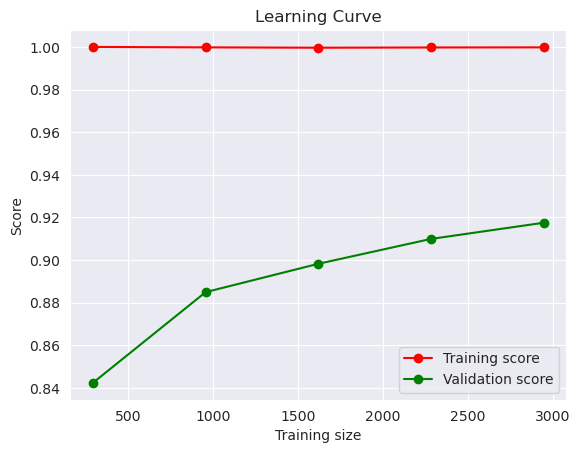

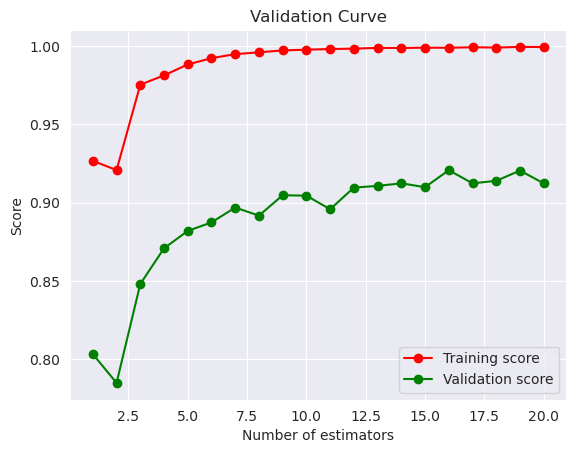

In [12]:

modelrf = RandomForestClassifier(n_estimators=20,class_weight= 'balanced')
modelrf.fit(X_train, y_train)

# print("动作识别：")
accuracyTrain = modelrf.score(X_train, y_train)
print('训练集准确率：%.2f%%' % (accuracyTrain * 100))
accuracyTest = (modelrf.score(X_test, y_test))
print('测试集准确率：%.2f%%' % (accuracyTest * 100))
# dump(modelrf, 'modelStre_force.joblib')#存储随机森林模型

# 预测测试集的概率
probs = modelrf.predict_proba(X_test)
# 设置阈值
threshold = 0.7

# 用于存储最终的预测结果（包括null）
final_predictions = []

for prob in probs:
    # 找到最高置信度
    max_prob = max(prob)
    if max_prob < threshold:
        # 如果最高置信度低于阈值，则标记为null
        final_predictions.append('null')
    else:
        # 否则，选择置信度最高的手势
        predicted_class = np.argmax(prob)
        final_predictions.append(predicted_class)
# print(final_predictions)
train_sizes, train_scores, valid_scores = learning_curve(modelrf, X_train, y_train, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# 验证曲线
param_range = np.arange(1, 21)
train_scores, valid_scores = validation_curve(modelrf, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(param_range, np.mean(valid_scores, axis=1), 'o-', color='g', label='Validation score')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()


SVC

分类报告：
              precision    recall  f1-score   support

         0.0       0.34      0.39      0.36       206
         1.0       0.48      0.51      0.49       336
         2.0       0.71      0.78      0.74       252
         3.0       0.52      0.54      0.53       309
         4.0       0.48      0.39      0.43       243
         5.0       0.57      0.46      0.50       235

    accuracy                           0.52      1581
   macro avg       0.52      0.51      0.51      1581
weighted avg       0.52      0.52      0.52      1581
测试准确率：51.80%
精确率：51.68%
召回率：51.23%
F1得分：51.20%


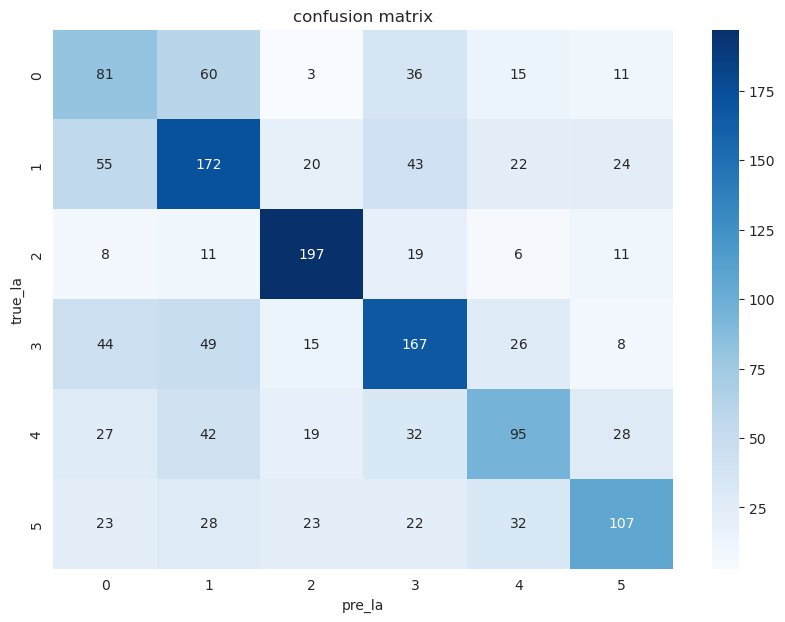

In [13]:
modelSvc = SVC(C=500, gamma=0.1)
modelSvc.fit(X_train, y_train)
y_pred = modelSvc.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 计算其他评分指标
accuracyTest = modelSvc.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)
print('测试准确率：%.2f%%' % (accuracyTest * 100))
print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()


Naive Bayes

分类报告：
              precision    recall  f1-score   support

         0.0       0.35      0.28      0.31       206
         1.0       0.82      0.10      0.17       336
         2.0       0.94      0.98      0.96       252
         3.0       0.94      0.26      0.40       309
         4.0       0.25      0.65      0.36       243
         5.0       0.55      0.89      0.68       235

    accuracy                           0.50      1581
   macro avg       0.64      0.53      0.48      1581
weighted avg       0.67      0.50      0.46      1581

精确率：63.90%
召回率：52.54%
F1得分：47.89%


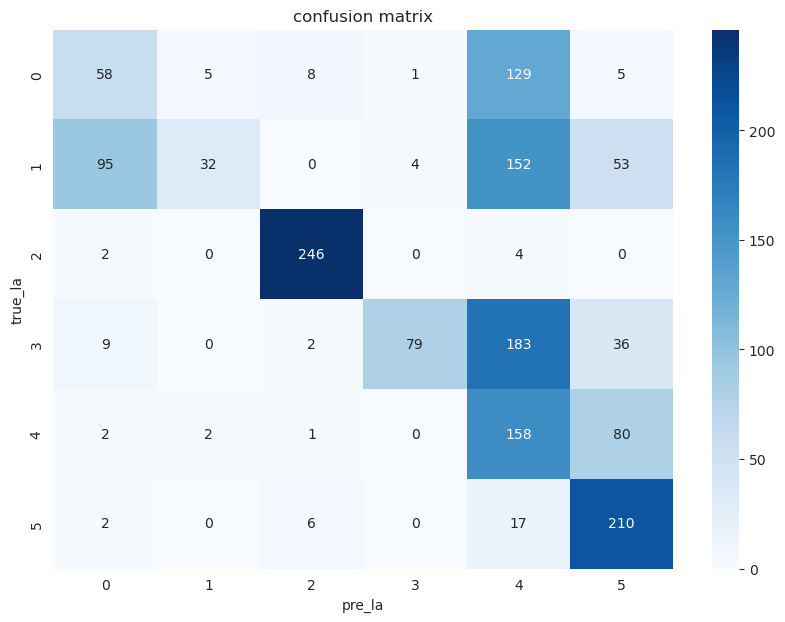

In [14]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 计算其他评分指标
accuracyTest = NB.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)

print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()


KNN

分类报告：
              precision    recall  f1-score   support

         0.0       0.20      0.26      0.23       206
         1.0       0.31      0.42      0.35       336
         2.0       0.49      0.48      0.48       252
         3.0       0.43      0.44      0.44       309
         4.0       0.35      0.21      0.27       243
         5.0       0.47      0.31      0.37       235

    accuracy                           0.36      1581
   macro avg       0.38      0.35      0.36      1581
weighted avg       0.38      0.36      0.36      1581

精确率：37.70%
召回率：35.28%
F1得分：35.71%


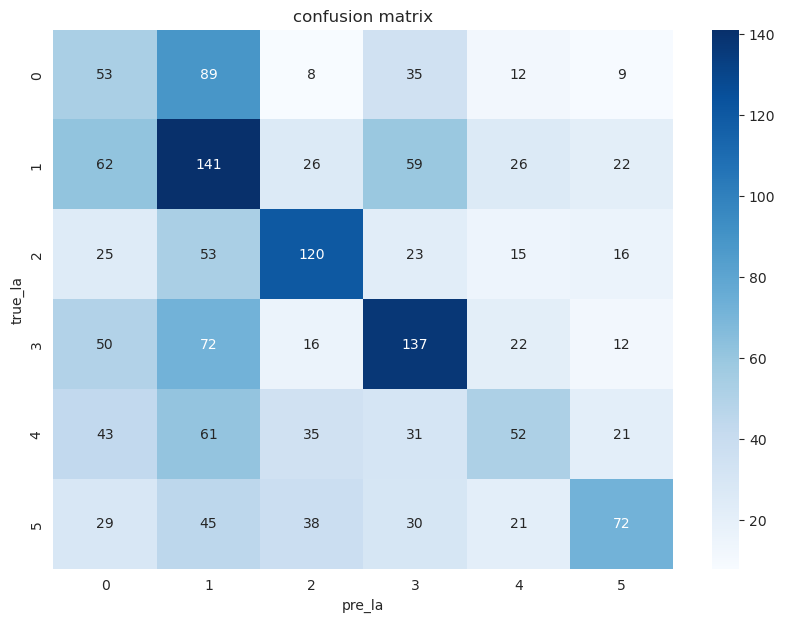

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

accuracyTest = knn.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)

print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()


RF 交叉

In [16]:
rf_clf = RandomForestClassifier(n_estimators=30,class_weight= 'balanced')  
scores = cross_val_score(rf_clf, X, Y, cv=10, scoring='accuracy')  # 使用准确率作为评分标准
# 打印每一折的结果以及平均准确率
print("Accuracy per fold: ", scores)
print("Average accuracy: ", scores.mean())
# plt.figure(figsize=(10,7))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.title("confusion matrix")
# plt.xlabel("pre_la")
# plt.ylabel("true_la")
# plt.show()


Accuracy per fold:  [0.94686907 0.78747628 0.80455408 0.82732448 0.85578748 0.86148008
 0.62808349 0.92395437 0.95437262 0.95247148]
Average accuracy:  0.8542373431649123


决策树

分类报告：
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75       206
         1.0       0.78      0.77      0.78       336
         2.0       0.96      0.93      0.95       252
         3.0       0.83      0.86      0.84       309
         4.0       0.75      0.77      0.76       243
         5.0       0.90      0.90      0.90       235

    accuracy                           0.83      1581
   macro avg       0.83      0.83      0.83      1581
weighted avg       0.83      0.83      0.83      1581

精确率：83.04%
召回率：82.83%
F1得分：82.92%


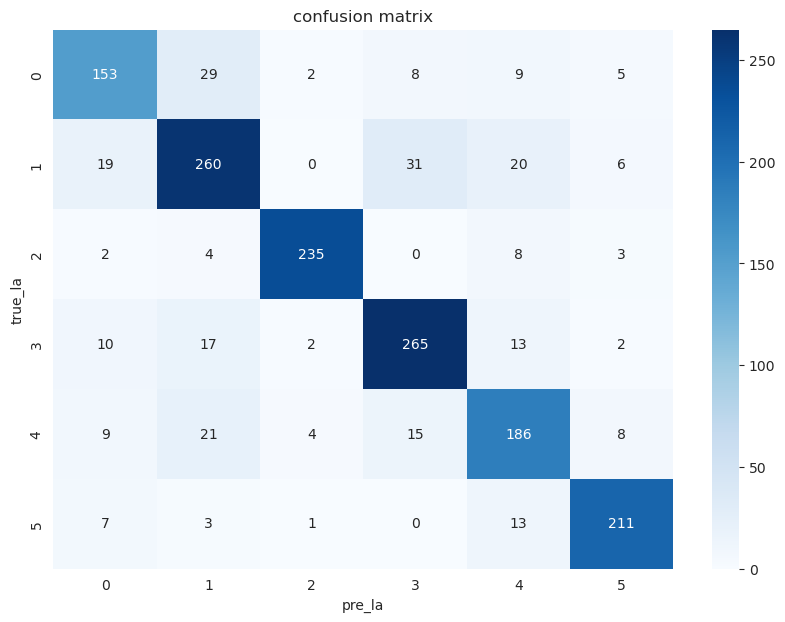

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 计算其他评分指标
accuracyTest = decision_tree.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)

print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()


RF

分类报告：
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       206
         1.0       0.87      0.91      0.89       336
         2.0       0.97      1.00      0.98       252
         3.0       0.92      0.92      0.92       309
         4.0       0.92      0.84      0.88       243
         5.0       0.96      0.95      0.96       235

    accuracy                           0.91      1581
   macro avg       0.92      0.91      0.91      1581
weighted avg       0.91      0.91      0.91      1581

精确率：91.59%
召回率：91.35%
F1得分：91.42%


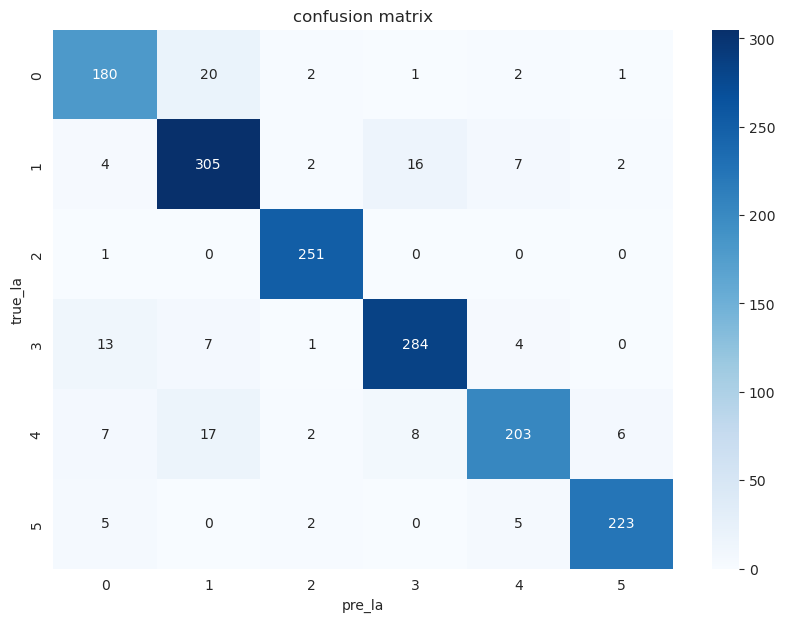

误分类概率矩阵：
[[0.         0.09708738 0.00970874 0.00485437 0.00970874 0.00485437]
 [0.01190476 0.         0.00595238 0.04761905 0.02083333 0.00595238]
 [0.00396825 0.         0.         0.         0.         0.        ]
 [0.0420712  0.02265372 0.00323625 0.         0.01294498 0.        ]
 [0.02880658 0.06995885 0.00823045 0.03292181 0.         0.02469136]
 [0.0212766  0.         0.00851064 0.         0.0212766  0.        ]]


In [21]:
y_pred = modelrf.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 计算其他评分指标
accuracyTest = modelrf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)

print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()
# 计算每个真实标签被误分类为其他标签的概率
num_classes = conf_matrix.shape[0]
misclassification_probs = np.zeros((num_classes, num_classes))

for i in range(num_classes):
    total_actual = np.sum(conf_matrix[i, :])
    for j in range(num_classes):
        if i != j:
            misclassification_probs[i, j] = conf_matrix[i, j] / total_actual

# 打印误分类概率
print('误分类概率矩阵：')
print(misclassification_probs)


gbc

分类报告：
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       206
         1.0       0.92      0.91      0.91       336
         2.0       0.97      0.99      0.98       252
         3.0       0.91      0.93      0.92       309
         4.0       0.91      0.88      0.90       243
         5.0       0.97      0.94      0.96       235

    accuracy                           0.93      1581
   macro avg       0.93      0.93      0.93      1581
weighted avg       0.93      0.93      0.93      1581

精确率：92.81%
召回率：92.81%
F1得分：92.79%


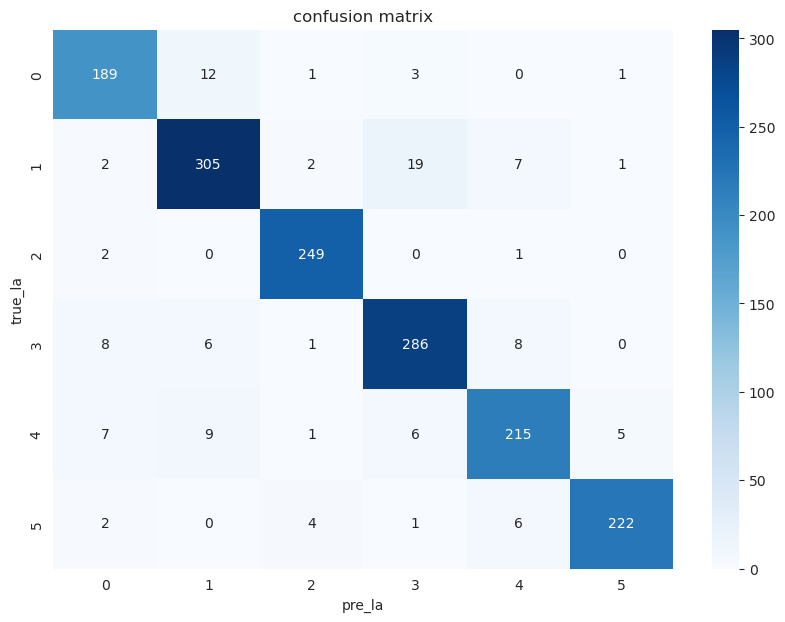

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 计算其他评分指标
accuracyTest = GBC.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy.append(accuracyTest)

print("精确率：%.2f%%" % (precision * 100))
print("召回率：%.2f%%" % (recall * 100))
print("F1得分：%.2f%%" % (f1 * 100))
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("pre_la")
plt.ylabel("true_la")
plt.show()
# print(accuracy)

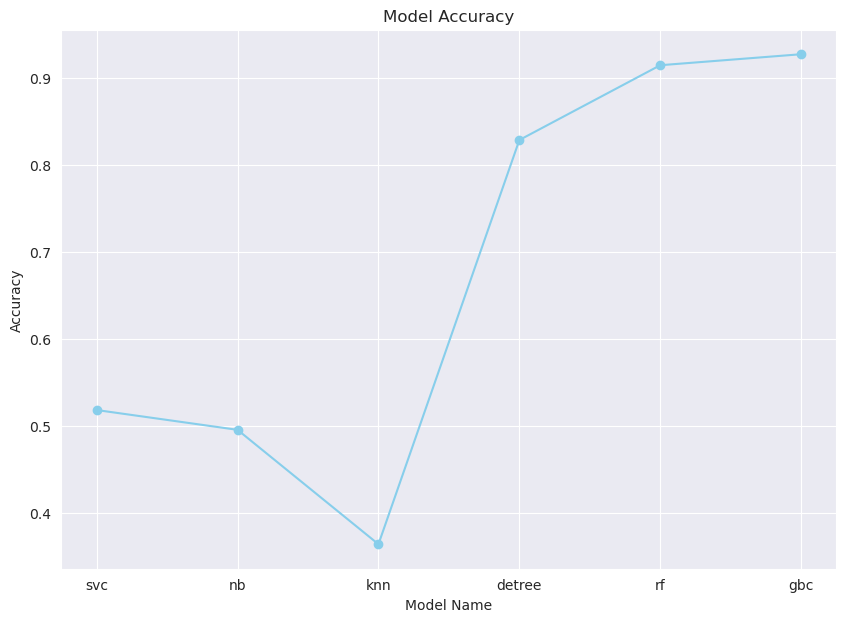

In [20]:
import matplotlib.pyplot as plt

# 假设这是你的准确率列表


# 模型名称
model_names = ['svc','nb','knn','detree','rf','gbc']

# 创建一个索引列表，用于在X轴上表示每个准确率值
index = range(len(accuracy))

# 绘制折线图
plt.figure(figsize=(10, 7))
plt.plot(model_names, accuracy, marker='o', linestyle='-', color='skyblue')

# 添加标题和坐标轴标签
plt.title('Model Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

# 设置X轴的刻度标签
plt.xticks(index, model_names)

# 显示图形
plt.show()
